In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_Transient_NS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H2.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.18 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Gasket Leak/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(all_data, axis=1, ignore_index=True)

df1["LeakType"] = "Gasket Leak"
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Gasket Leak
1,19352.0,-6370.0,-7168.0,10979.0,2207,529.0,-5427,-1840.0,-5545.0,3047.0,7654.0,-11281.0,Gasket Leak
2,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Gasket Leak
3,19323.0,-6417.0,-7127.0,10934.0,2141,236.0,-5736,-1907.0,-5540.0,3018.0,7437.0,-11366.0,Gasket Leak
4,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Gasket Leak


In [4]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Circumferential Crack/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(all_data, axis=1, ignore_index=True)

df2["LeakType"] = "Circumferential Crack"
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Circumferential Crack
1,-821.0,-4482.0,2524.0,-10967,3050.0,11209.0,1567.0,-7816.0,7045,3493.0,-3274.0,10598.0,Circumferential Crack
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Circumferential Crack
3,-925.0,-4362.0,2560.0,-11074,3104.0,11301.0,1555.0,-7832.0,7050,3410.0,-3079.0,10547.0,Circumferential Crack
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,Circumferential Crack


In [5]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Longitudinal Crack/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df3 = pd.concat(all_data, axis=1, ignore_index=True)

df3["LeakType"] = "Longitudinal Crack"
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Longitudinal Crack
1,3119.0,8020.0,-231,7918.0,-3936.0,1041.0,3735.0,-1288.0,-8645.0,-15102.0,-1625.0,-3713,Longitudinal Crack
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Longitudinal Crack
3,3052.0,8167.0,-157,7967.0,-4017.0,982.0,3776.0,-1320.0,-8615.0,-15160.0,-1708.0,-3940,Longitudinal Crack
4,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Longitudinal Crack


In [6]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/NonLeak/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df4 = pd.concat(all_data, axis=1, ignore_index=True)

df4["LeakType"] = "NonLeak"
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NonLeak
1,-4302.0,-2562.0,-4640.0,1172,10618.0,1570,-15452.0,2668.0,-4011.0,1414.0,-1954.0,5828.0,NonLeak
2,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NonLeak
3,-4277.0,-2608.0,-4494.0,1234,10563.0,1552,-15743.0,2812.0,-3939.0,1489.0,-1551.0,5655.0,NonLeak
4,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NonLeak


In [7]:
data_dir = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Looped/Orifice Leak/"
file_extension = ".raw"
sampling_rate = 8000

all_data = []

# Loop through all .raw files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(file_extension):
        file_path = os.path.join(data_dir, filename)
        
        with open(file_path, "rb") as file:
            file_content = file.read()
            
        # Convert binary data to NumPy array that will be a dataframe
        hydrophone_data =  pd.DataFrame(np.frombuffer(file_content, dtype=np.int16))
        
        all_data.append(hydrophone_data)
        
# Concatenate all DataFrames into a single DataFrame
df5 = pd.concat(all_data, axis=1, ignore_index=True)

df5["LeakType"] = "Orifice Leak"
df5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Orifice Leak
1,3666,7506.0,-2422.0,-82.0,3903.0,4035.0,59.0,-615.0,67.0,-1974.0,-2464,-2864.0,Orifice Leak
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Orifice Leak
3,3661,7390.0,-2361.0,-53.0,3757.0,4323.0,38.0,-596.0,60.0,-1910.0,-2437,-2802.0,Orifice Leak
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Orifice Leak


In [8]:
df5.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
592910,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Orifice Leak
592911,1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1934,NaN,Orifice Leak
592912,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Orifice Leak
592913,1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1887,NaN,Orifice Leak
592914,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Orifice Leak
592915,978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1841,NaN,Orifice Leak
592916,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Orifice Leak
592917,863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1805,NaN,Orifice Leak
592918,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Orifice Leak
592919,769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1757,NaN,Orifice Leak


In [9]:
data = pd.concat([df1, df2, df3, df4, df5], axis=0)
data

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gasket Leak
1,19352.0,-6370.0,-7168.0,10979.0,2207.0,529.0,-5427.0,-1840.0,-5545.0,3047.0,7654.0,-11281.0,Gasket Leak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gasket Leak
3,19323.0,-6417.0,-7127.0,10934.0,2141.0,236.0,-5736.0,-1907.0,-5540.0,3018.0,7437.0,-11366.0,Gasket Leak
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gasket Leak
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592915,978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1841.0,NaN,Orifice Leak
592916,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Orifice Leak
592917,863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1805.0,NaN,Orifice Leak
592918,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Orifice Leak


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136600 entries, 0 to 592919
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   0         float64
 1   1         float64
 2   2         float64
 3   3         float64
 4   4         float64
 5   5         float64
 6   6         float64
 7   7         float64
 8   8         float64
 9   9         float64
 10  10        float64
 11  11        float64
 12  LeakType  object 
dtypes: float64(12), object(1)
memory usage: 335.0+ MB


In [11]:
data.isna().sum()

0           149000
1           224000
2           177000
3            65500
4           145000
5           108000
6           157000
7           188000
8           115500
9           188500
10          200000
11          200500
LeakType         0
dtype: int64

In [12]:
data = data.dropna(axis=0)
data.isna().sum()

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
LeakType    0
dtype: int64

In [13]:
data.nunique()

0           50936
1           42721
2           40960
3           34005
4           47610
5           43860
6           43731
7           52553
8           43383
9           37139
10          48198
11          40179
LeakType        5
dtype: int64

In [14]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06,2.885100e+06
mean,1.099951e+01,7.375364e+00,5.780630e+00,4.531074e+00,4.365190e+00,1.133048e+01,5.321903e+00,1.344541e+00,5.307662e+00,9.084438e+00,1.004977e+00,6.510090e+00
std,4.468559e+03,4.124403e+03,4.452625e+03,3.399102e+03,4.973353e+03,4.522886e+03,4.391047e+03,4.713427e+03,4.256850e+03,3.880505e+03,4.268296e+03,4.059965e+03
min,-3.276800e+04,-3.276800e+04,-2.476000e+04,-2.233200e+04,-3.276800e+04,-3.276800e+04,-3.276800e+04,-3.276800e+04,-3.276800e+04,-2.381100e+04,-3.276800e+04,-3.276800e+04
25%,0.000000e+00,0.000000e+00,0.000000e+00,-8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.800000e+01,-9.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.400000e+01,2.200000e+01,5.000000e+00,0.000000e+00,2.900000e+01,2.100000e+01,1.200000e+01,1.500000e+01,0.000000e+00,0.000000e+00,1.400000e+01,3.300000e+01
max,3.276700e+04,3.276700e+04,2.625300e+04,2.143100e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,3.276700e+04,2.358800e+04,3.276700e+04,3.276700e+04


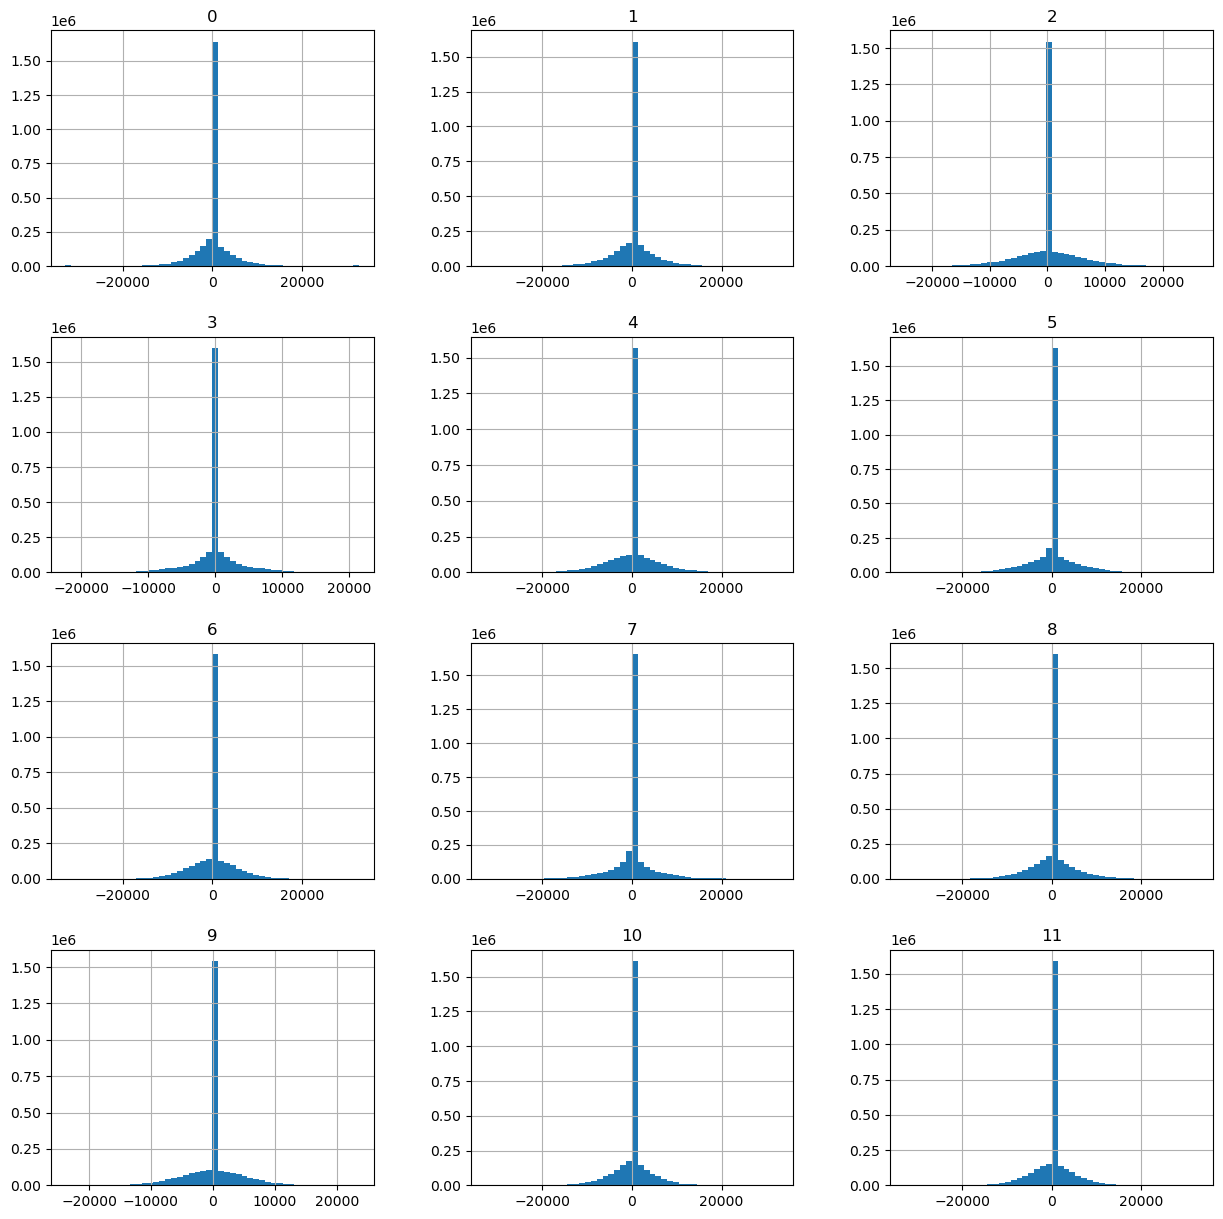

In [15]:
data.hist(bins=50, figsize=(15,15))
plt.show()

In [16]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(2885100, 13)
(1442555, 13)


In [17]:
label_encoder = LabelEncoder()
data['category_label_encoded'] = label_encoder.fit_transform(data['LeakType'])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType,category_label_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gasket Leak,1
1,19352.0,-6370.0,-7168.0,10979.0,2207.0,529.0,-5427.0,-1840.0,-5545.0,3047.0,7654.0,-11281.0,Gasket Leak,1
3,19323.0,-6417.0,-7127.0,10934.0,2141.0,236.0,-5736.0,-1907.0,-5540.0,3018.0,7437.0,-11366.0,Gasket Leak,1
5,19299.0,-6459.0,-7083.0,10864.0,2077.0,-50.0,-6046.0,-1953.0,-5532.0,2970.0,7230.0,-11483.0,Gasket Leak,1
7,19258.0,-6493.0,-7037.0,10771.0,2008.0,-330.0,-6363.0,-1984.0,-5522.0,2907.0,7031.0,-11607.0,Gasket Leak,1


In [18]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,LeakType,category_label_encoded
273117,-2334.0,-5728.0,-12865.0,5235.0,2740.0,-4953.0,-12381.0,-8867.0,5276.0,4624.0,3813.0,1747.0,Gasket Leak,1
135079,-4154.0,8230.0,5451.0,-2897.0,1522.0,-5369.0,-8108.0,-1773.0,-7574.0,-2863.0,-1809.0,9778.0,Orifice Leak,4
148877,2359.0,9718.0,-7411.0,59.0,-2336.0,6.0,2256.0,-783.0,-2300.0,-6481.0,-18155.0,-1480.0,NonLeak,3
383797,-1526.0,-13988.0,1061.0,4647.0,1141.0,6225.0,-5841.0,-10963.0,-5933.0,10506.0,4878.0,4667.0,Longitudinal Crack,2
217339,6252.0,4167.0,-7124.0,-3388.0,-9857.0,1616.0,5622.0,43.0,5770.0,-10592.0,-3678.0,6583.0,Longitudinal Crack,2
6035,-4654.0,-6815.0,-2073.0,822.0,-5786.0,-201.0,4591.0,2699.0,1623.0,2844.0,493.0,-5036.0,NonLeak,3
234573,3321.0,-4717.0,-5894.0,-5715.0,-12909.0,-11659.0,8258.0,26296.0,291.0,11950.0,-1486.0,7597.0,Longitudinal Crack,2
504123,-2647.0,1631.0,-7424.0,-5032.0,11681.0,-54.0,-969.0,549.0,-1868.0,1917.0,-1829.0,-2330.0,Circumferential Crack,0
75279,-6768.0,13246.0,-444.0,-815.0,-11353.0,46.0,-2294.0,256.0,-3707.0,5662.0,-3843.0,-10090.0,NonLeak,3
138087,-1960.0,-4375.0,2423.0,-835.0,-12111.0,-929.0,2927.0,-7644.0,3837.0,2398.0,29031.0,2489.0,NonLeak,3


In [19]:
X = data.drop(['LeakType', 'category_label_encoded'], axis=1)  # Features
y = data['category_label_encoded']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y

0         1
1         1
3         1
5         1
7         1
         ..
577411    4
577413    4
577415    4
577417    4
577419    4
Name: category_label_encoded, Length: 1442555, dtype: int64

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Build DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer, 5 for the number of unique categories

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_data=(X_test_scaled, y_test))
model.summary()

Epoch 1/20
72128/72128 [==============================] - 274s 4ms/step - loss: 0.3823 - accuracy: 0.8598 - val_loss: 0.3135 - val_accuracy: 0.8842
Epoch 2/20
72128/72128 [==============================] - 270s 4ms/step - loss: 0.3022 - accuracy: 0.8877 - val_loss: 0.2829 - val_accuracy: 0.8946
Epoch 3/20
72128/72128 [==============================] - 259s 4ms/step - loss: 0.2826 - accuracy: 0.8948 - val_loss: 0.2735 - val_accuracy: 0.8991
Epoch 4/20
72128/72128 [==============================] - 260s 4ms/step - loss: 0.2720 - accuracy: 0.8991 - val_loss: 0.2731 - val_accuracy: 0.8978
Epoch 5/20
72128/72128 [==============================] - 271s 4ms/step - loss: 0.2642 - accuracy: 0.9019 - val_loss: 0.2592 - val_accuracy: 0.9038
Epoch 6/20
72128/72128 [==============================] - 260s 4ms/step - loss: 0.2589 - accuracy: 0.9042 - val_loss: 0.2647 - val_accuracy: 0.9010
Epoch 7/20
72128/72128 [==============================] - 264s 4ms/step - loss: 0.2548 - accuracy: 0.9056 - val_